install packages

In [ ]:
!pip install tensorflow keras matplotlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


#Define the base directory for the dataset
base_dir='/content/drive/MyDrive/DATA SET/chest_xray'

#Directories for train, validation and test set


train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

#Define Image dimension and batch size
IMG_HEIGHT= 150
IMG_WIDTH= 150
BATCH_SIZE= 32

#Data augmentation for training set

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    zoom_range=0.2
)

#for validation and test sets, only rescaling is applied
test_datagen = ImageDataGenerator(rescale=1./255)

#Load the training set
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

#Load the validation set
Validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model= Sequential([
    #First conulutional layer
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2,2)),
    #Second convolutional layer
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    #Third convlutional layer
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
#Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Train the model
epochs=10
history=model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=epochs,
    validation_data=Validation_generator,
    validation_steps=Validation_generator.samples // BATCH_SIZE
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1775s 11s/step - accuracy: 0.7210 - loss: 0.6116 - val_accuracy: 0.9375 - val_loss: 0.5839
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 375s 2s/step - accuracy: 0.8756 - loss: 0.3074 - val_accuracy: 0.8750 - val_loss: 0.6145
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 401s 2s/step - accuracy: 0.8746 - loss: 0.2937 - val_accuracy: 0.8125 - val_loss: 0.5857
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 423s 2s/step - accuracy: 0.8971 - loss: 0.2470 - val_accuracy: 0.8750 - val_loss: 0.5295
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 366s 2s/step - accuracy: 0.9096 - loss: 0.2203 - val_accuracy: 0.7500 - val_loss: 0.6559
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 379s 2s/step - accuracy: 0.9229 - loss: 0.2017 - val_accuracy: 0.7500 - val_loss: 0.6407
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 368s 2s/step - accuracy: 0.9216 - loss: 0.1981 - val_accuracy: 0.9375 - val_loss: 0.3592
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 386s 2s/step - accuracy: 0.9313 - loss: 0.1792 - val_ac

Found 624 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 18s 904ms/step - accuracy: 0.8931 - loss: 0.3213
Test Accuracy: 88.49%


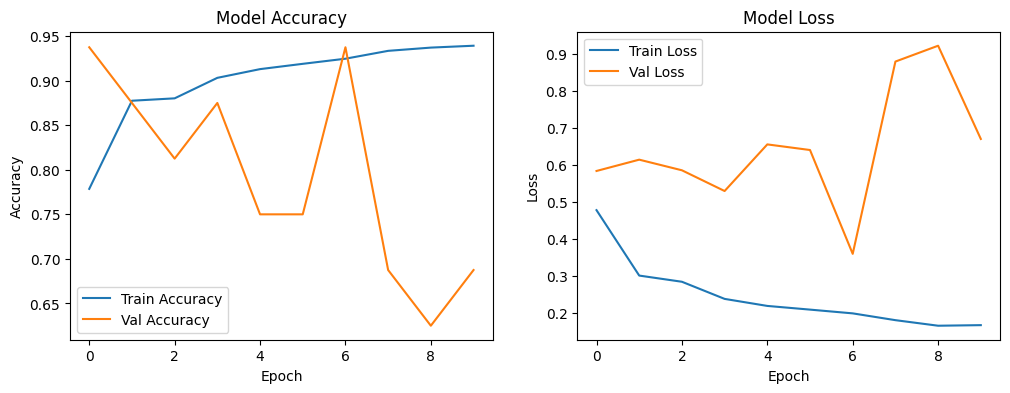

In [ ]:
#Load the test set
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)
#evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // BATCH_SIZE)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

#Plot training and validation accuracy values
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

#Plot training and validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 843ms/step


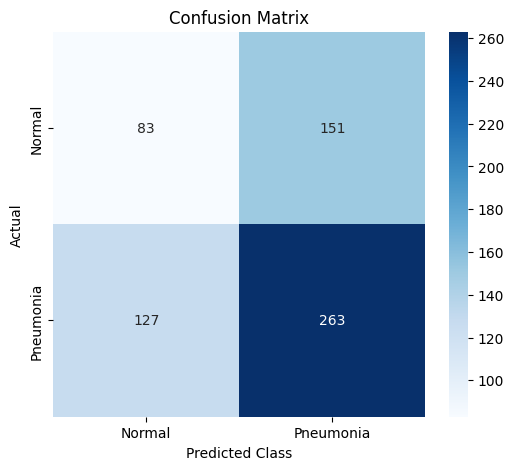

              precision    recall  f1-score   support

      Normal       0.40      0.35      0.37       234
   Pneumonia       0.64      0.67      0.65       390

    accuracy                           0.55       624
   macro avg       0.52      0.51      0.51       624
weighted avg       0.55      0.55      0.55       624



In [ ]:
#Generate prediction
Y_pred = model.predict(test_generator, steps=test_generator.samples // BATCH_SIZE + 1)
import numpy as np
Y_pred = np.where(Y_pred > 0.5, 1, 0) #convert probabilities into binary labels

#Get true labels
y_true = test_generator.classes

#Confusion matrix and Classification report
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_true, Y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted Class")
plt.show()

#Classification report
print(classification_report(y_true, Y_pred, target_names=['Normal', 'Pneumonia']))

In [ ]:
from google.colab import files

files.download('my_chest_xray_model.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save the model
model.save('my_chest_xray_model.keras')
print("Model saved as my_chest_xray_model.keras")

Model saved as my_chest_xray_model.keras
